#### linear

- logistic regression
- SVM(Support Vector Machine)

##### Non linear data

- KNN
- Decision Tree
- Random Forest
- Naive Bayes classifier etc

#### Decision (user for both regression and classification)
***ID3 Algorithm***
- uses entropy---->the feature having the lowest gini value selected as 
- entropy---->uncertainity in data
- information gain--->difference b/w entropy before and after splitting the data
***CART ALgorithm***
- use gini index--->the feature having the lowest gini value selected as rootnode

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
import pandas as pd
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["target"]=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df["target"].unique()

array([0, 1, 2])

In [10]:
x=iris_df.drop('target',axis=1)

In [11]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y=iris_df["target"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)


In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra

In [17]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
accuracy_score(y_test,y_pred)

0.9555555555555556

In [21]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [26]:
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average

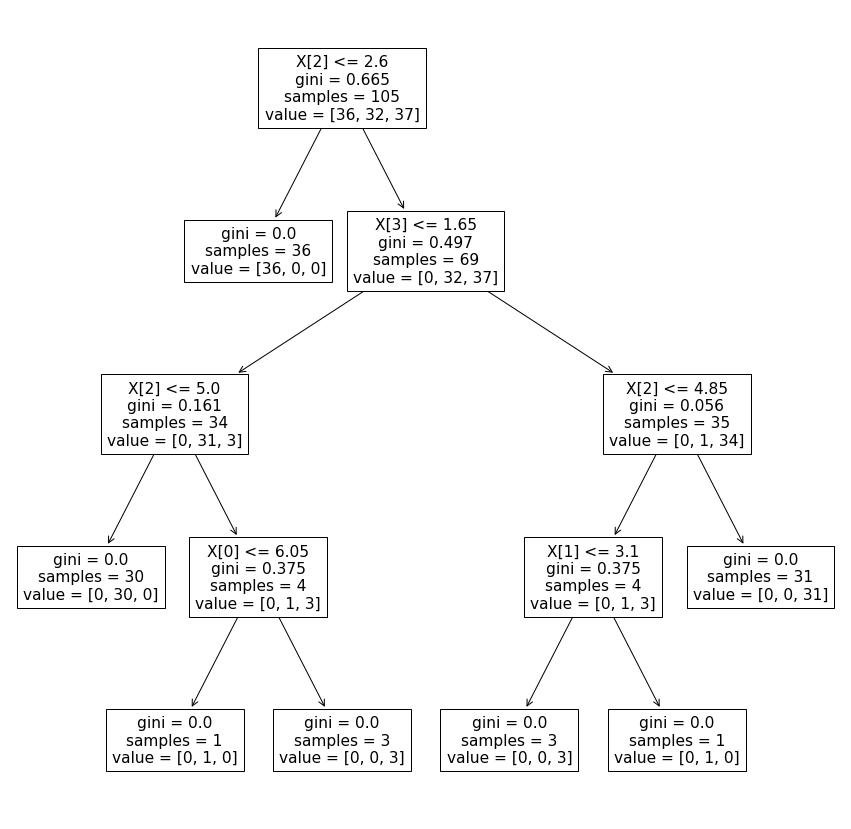

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

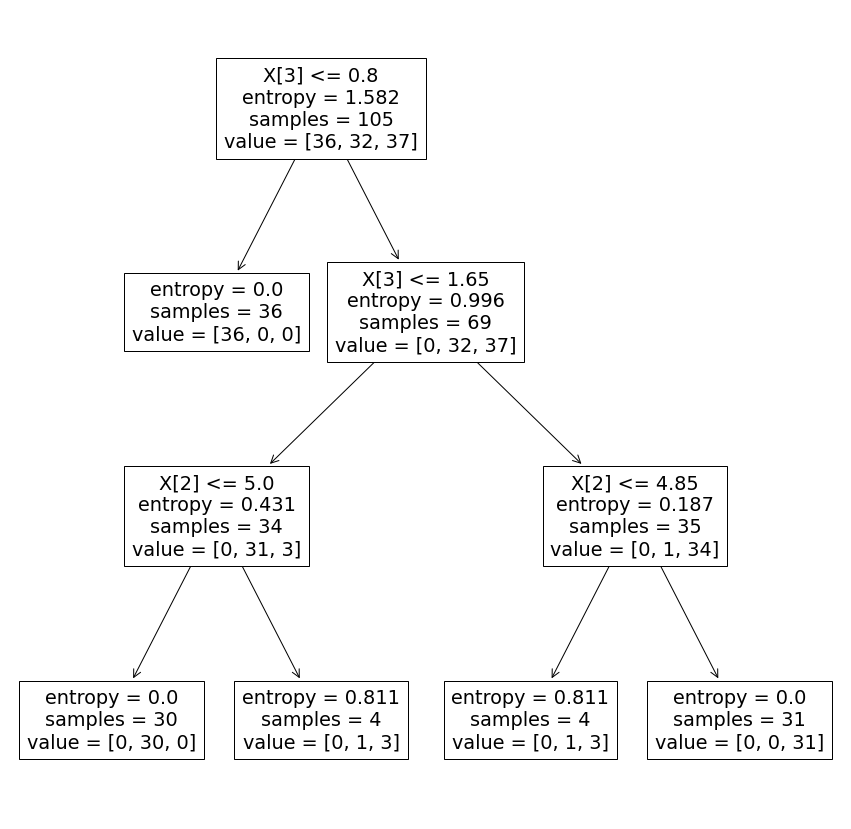

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [36]:
##Try to apply the heartdisese dataset to decsion tree algorithm and compare the accuracy
df=pd.read_csv("C:/Users/HP/Downloads/archive(3)/heart.csv")

***Decision Tree Regessor***

In [37]:
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/age_salary_hours.csv")

In [38]:
df

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher
...,...,...,...,...
495,27,47000.0,40.0,Bachelor's degree or higher
496,53,132000.0,70.0,Bachelor's degree or higher
497,51,10100.0,20.0,Bachelor's degree or higher
498,32,57000.0,35.0,Bachelor's degree or higher


In [39]:
df["Education"].unique()

array(["Bachelor's degree or higher", 'High school diploma',
       "Associate's degree", 'Attended college, no degree', 'No diploma'],
      dtype=object)

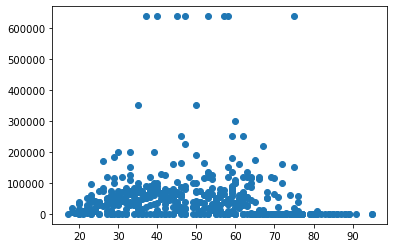

In [40]:
plt.scatter(df["Age"],df["Annual Salary"])

In [42]:
df.isna().sum()

Age              0
Annual Salary    0
Weekly hours     0
Education        0
dtype: int64

In [47]:
x=df.loc[:,["Age","Weekly hours"]]
x

,Age,Weekly hours
0,72,40.0
1,72,50.0
2,31,40.0
3,28,40.0
4,54,40.0
...,...,...
495,27,40.0
496,53,70.0
497,51,20.0
498,32,35.0


In [48]:
y=df["Annual Salary"]
y

0      160000.0
1      100000.0
2      120000.0
3       45000.0
4       85000.0
         ...   
495     47000.0
496    132000.0
497     10100.0
498     57000.0
499     18700.0
Name: Annual Salary, Length: 500, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [61]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [63]:
y_pred=model.predict(x_test)

In [64]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

-64.36341044243741

In [65]:
mean_squared_error(y_test,y_pred)

12070931377.70767

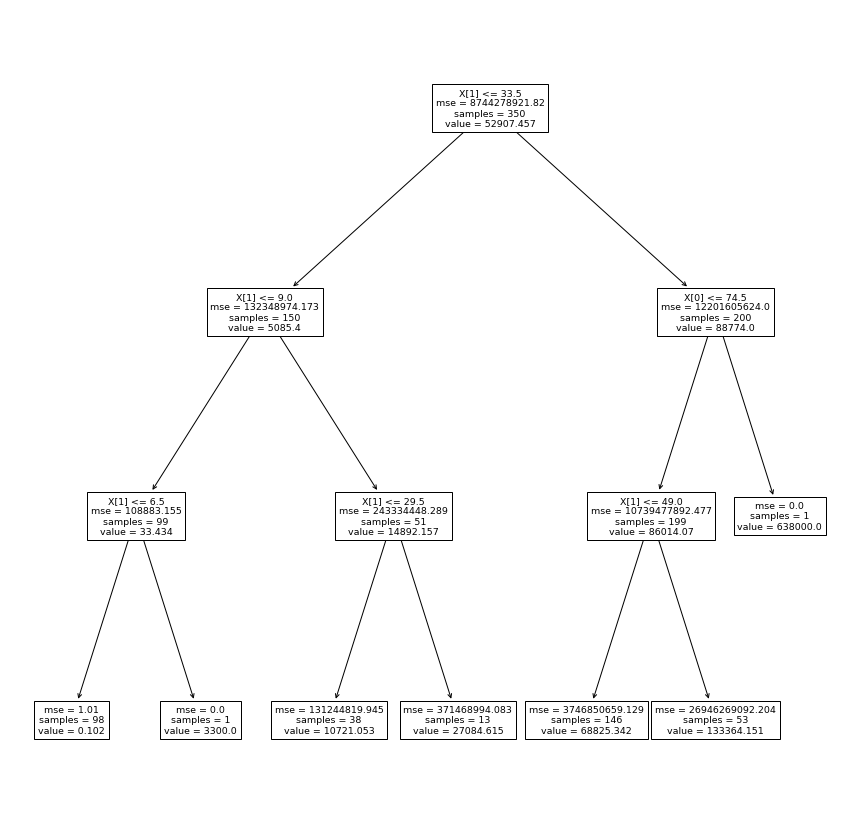

In [66]:
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

##### Task
- apply decision tree regressor for insurance dataset
